In [1]:
import uproot
import pandas as pd
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt
import pickle
import atlasplots as ap
%matplotlib inline

In [2]:
df_gj = pickle.load(open('picklefiles/df_gj_800664_truth.pickle', 'rb'))
df_jjfull = pickle.load(open('picklefiles/df_jj_801279.pickle', 'rb'))  #with both

In [3]:
df_gj.size, df_jjfull.size

(50055258, 11721468)

In [4]:
ap.atlasstyle()

added /eos/user/k/kyklazek/helvetica_font/HelveticaBold.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_3.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaBoldOblique.ttf
cannot add /eos/user/k/kyklazek/helvetica_font/Helvetica_4.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_0.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLightOblique.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_1.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaOblique.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLight.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_2.ttf


In [4]:
ap.*?

In [5]:
ap.makebh?

In [6]:
# ap.goodmakebh?
ap.ATLAShist?

In [7]:
# (df_jj.y_isTruthMatchedPhoton == False), bool(list(df_jj.y_isTruthMatchedPhoton))

In [9]:
histogj = ap.makebh(df_gj,ap.branchlist[2],ap.minmaxlist[2])#,weightname='mcTotWeight/yWeight')
histojjfull = ap.makebh(df_jjfull,ap.branchlist[2],ap.minmaxlist[2])#,weightname='mcTotWeight/yWeight')
histojj = ap.makebh(df_jjfull,ap.branchlist[2],ap.minmaxlist[2],boolslice=(~df_jjfull.y_isTruthMatchedPhoton)) #just fakes

In [10]:
# bool(list([]))

In [11]:
# bool(list((~df_jj.y_isTruthMatchedPhoton)))
# print(False)

In [12]:
totaldf = df_gj.append(df_jjfull)
totalhisto = ap.makebh(totaldf,ap.branchlist[2],ap.minmaxlist[2])

In [13]:
totaldf.shape, df_gj.shape, df_jjfull.shape

((2808033, 21), (2275239, 21), (532794, 21))

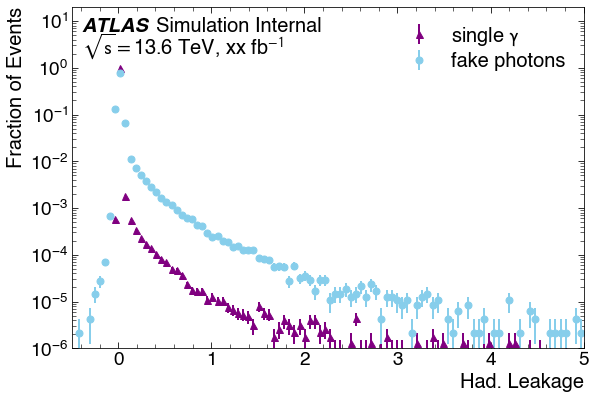

In [14]:
ap.ATLAShist(histogj,histojj,ap.labellist[2],ap.minmaxlist[2])

In [15]:
# ap.ATLAShist(totalhisto,histogj+histojj,ap.labellist[2],ap.minmaxlist[2])

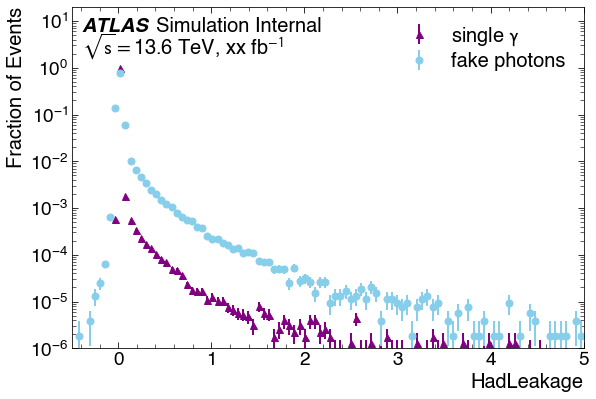

In [16]:
hadhistogj = ap.makebh(df_gj,'HadLeakage',ap.minmaxlist[0])
hadhistojj = ap.makebh(df_jjfull,'HadLeakage',ap.minmaxlist[0])
ap.ATLAShist(hadhistogj,hadhistojj,'HadLeakage',ap.minmaxlist[0])

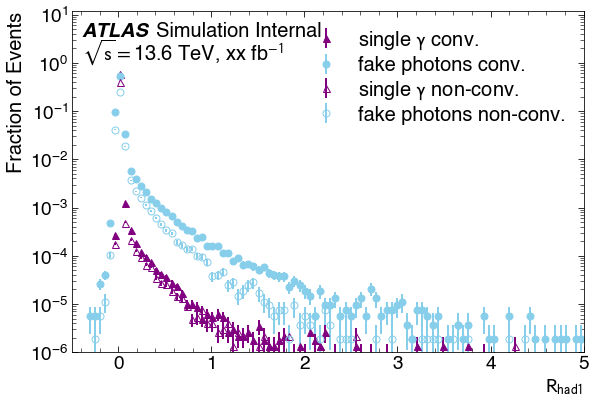

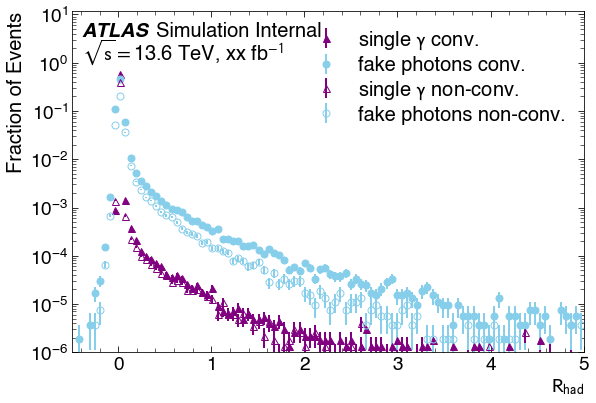

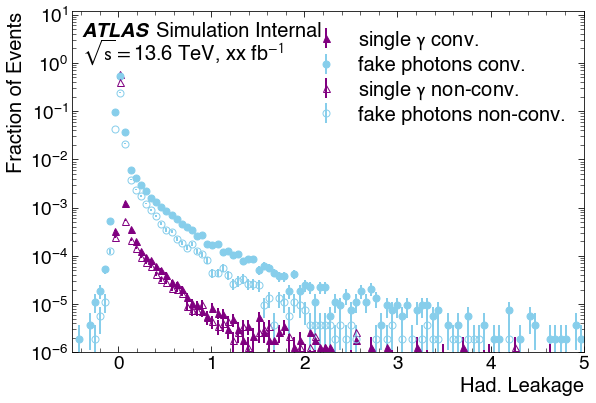

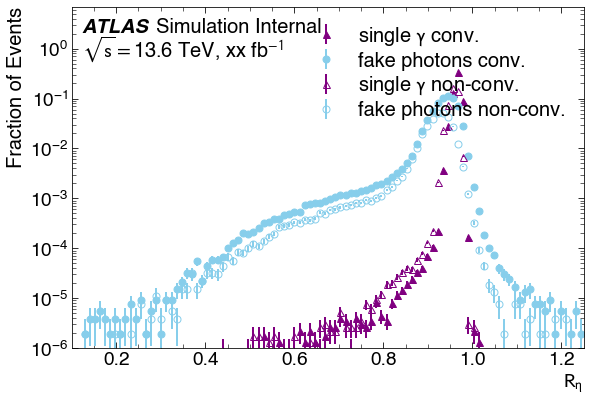

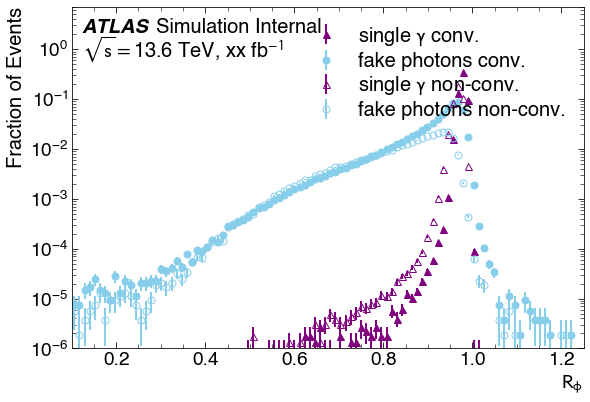

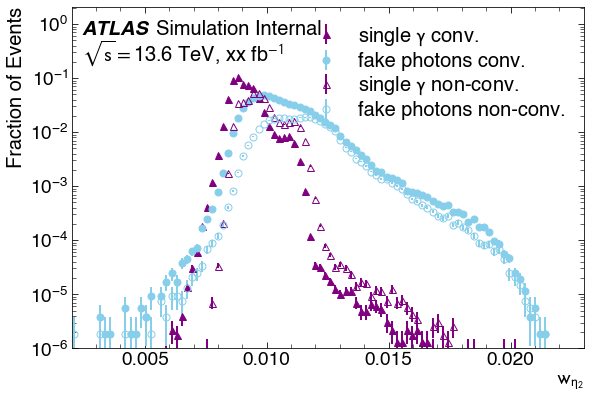

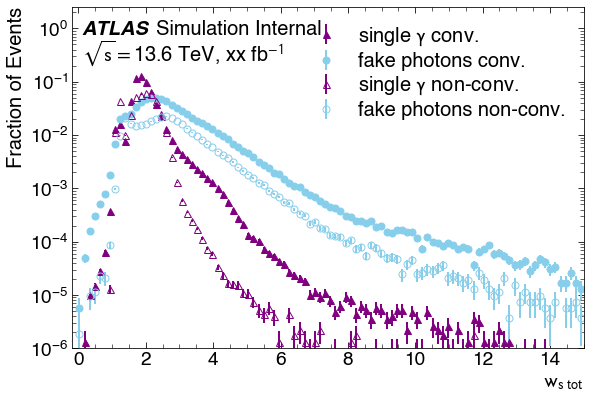

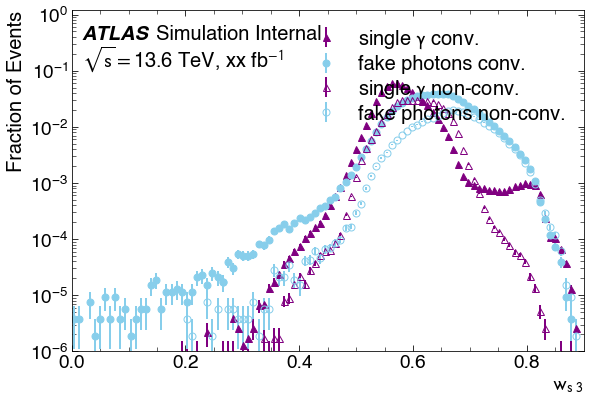

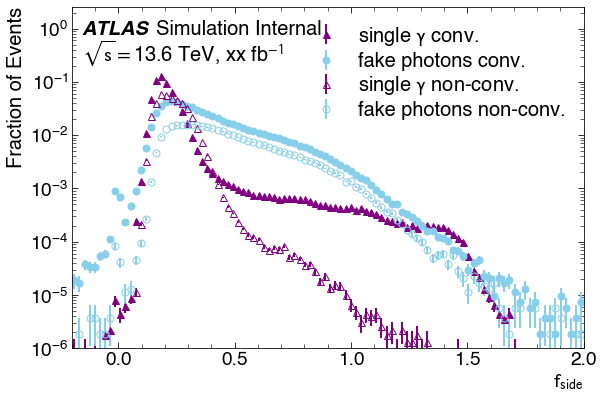

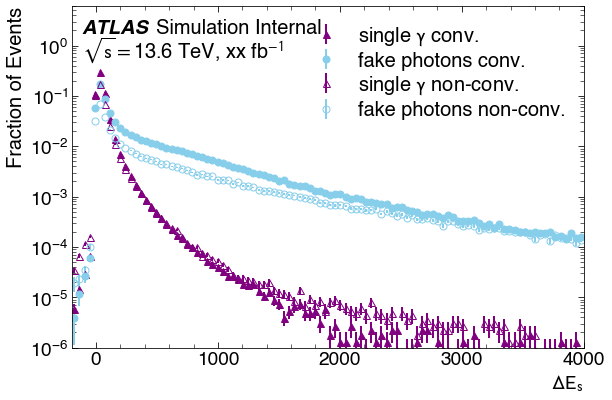

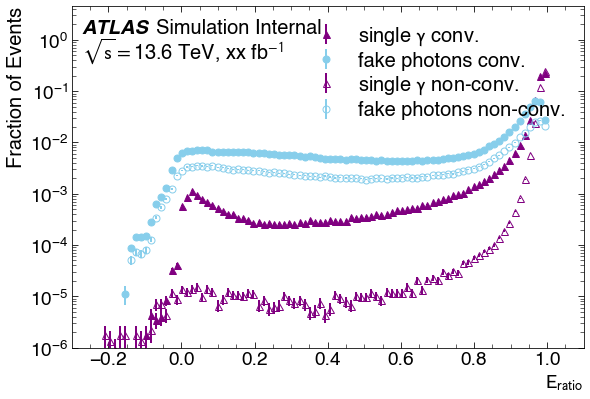

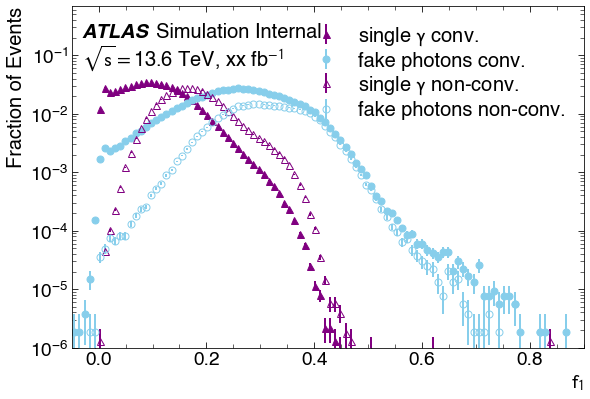

In [17]:
for i in range(len(ap.branchlist)):
    branchname = ap.branchlist[i]
    label = ap.labellist[i]
    minmax = ap.minmaxlist[i]
    hist1c = ap.makebh(df_gj,branchname,minmax,boolslice=list(df_gj.y_truth_convType == 0)) 
    hist2c = ap.makebh(df_jjfull,branchname,minmax,boolslice=list(~df_jjfull.y_isTruthMatchedPhoton & df_jjfull.y_truth_convType == 0))
    hist1nc = ap.makebh(df_gj,branchname,minmax,boolslice=list(df_gj.y_truth_convType > 0))
    hist2nc = ap.makebh(df_jjfull,branchname,minmax,boolslice=list(~df_jjfull.y_isTruthMatchedPhoton & df_jjfull.y_truth_convType > 0))
    ap.ATLAShist4(hist1c,hist2c,hist1nc,hist2nc,label,minmax,'truthconv/convtruefalse_'+branchname+'_totalnorm',totalnorm=True)

In [7]:
df_jj = df_jjfull[~df_jjfull.y_isTruthMatchedPhoton]

### first try Rhad vs Rhad1
Rhadhisto1  = ap.makebh(df_gj,'y_Rhad', ap.minmaxlist[1])
Rhadhisto2  = ap.makebh(df_jj,'y_Rhad', ap.minmaxlist[1])
Rhad1histo1 = ap.makebh(df_gj,'y_Rhad1', ap.minmaxlist[0])
Rhad1histo2 = ap.makebh(df_jj,'y_Rhad1', ap.minmaxlist[0])
HadLeakhisto1 = ap.makebh(df_gj, 'HadLeakage', ap.minmaxlist[0])
HadLeakhisto2 = ap.makebh(df_jj, 'HadLeakage', ap.minmaxlist[0])

In [8]:
df_jj.size

10444698

In [16]:
ap.makebh?

In [26]:
### ATLAS plot for 6 variables

def ATLAShist6(hist1,hist2,h1nc,h2nc,hist5,hist6, label='variable name',minmax=(-0.5, 5),figname=False,log=True,norm=True,totalnorm=False,label1=r'single $\gamma$ Rhad',label2=r'fake $\gamma$ Rhad',label3=r'single $\gamma$ Rhad1', label4=r'fake $\gamma$ Rhad1', label5=r'single $\gamma$ HadLeak', label6=r'fake $\gamma$ HadLeak'):
    '''right now for Rhad, Rhad1, HadLeakage Plotting
            hist1 and h1nc, as well as hist2 and h2nc, pattern together colour-wise.
    
    minmax is for x axis: minmax=[minx,maxx]   -  list or tuple
    
    label is variable name. ex.: label=r"$R_{had1}$"
    
    figname is name of .pdf file, if anything is written in. If left False, no file will be created
    
    totalnorm = True divides the converted and unconverted rates by total: (sum of conv. & unconv.)
              = False divides each rate by just the sum of itself. (separates conv. and unconv.)
    
    ***STILL TO DO:***
                - FIX totalnorm=True
                - maybe add a **kwargs functionality for things like colors, legend labels etc. (how to have a default val.?)
                - FIX log==False
                - Figure out consistency of top/ bottom for
                                    - log=True, norm=False
                                    - log=False
                - Figure out ATLAS label for log=False
                - add in number for 'xx fb^-1'
                - maybe add option for dpi/format change for savefig
    '''
    
    integral1 = hist1.sum().value
    integral2 = hist2.sum().value
    integral1nc = h1nc.sum().value
    integral2nc = h2nc.sum().value
    integral5 = hist5.sum().value
    integral6 = hist6.sum().value
    minn = minmax[0]
    maxx = minmax[1]
    
    if totalnorm==True:
        integral1 = integral1 + integral1nc
        integral2 = integral2 + integral2nc
        integral1nc = integral1
        integral2nc = integral2
    
    plt.close('all')
    plt.figure(figsize=(9,6))
    
    # draw errobars, use the sqrt error. You can use what you want there
    # poissonian 1 sigma intervals would make more sense
    if norm==True:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value/integral1, yerr=np.sqrt(hist1.view().variance)/integral1,
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=label1)
        plt.errorbar(hist2.axes[0].centers, hist2.view().value/integral2, yerr=np.sqrt(hist2.view().variance)/integral2,
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=label2)
        plt.errorbar(h1nc.axes[0].centers, h1nc.view().value/integral1nc, yerr=np.sqrt(h1nc.view().variance)/integral1nc,
                 fmt='^',mec='purple',mfc='none',ecolor='purple',ms=7,label=label3)
        plt.errorbar(h2nc.axes[0].centers, h2nc.view().value/integral2nc, yerr=np.sqrt(h2nc.view().variance)/integral2nc,
                 fmt='ro',mec='skyblue',mfc='none',ecolor='skyblue',ms=7,label=label4)
        plt.errorbar(hist5.axes[0].centers, hist5.view().value/integral5, yerr=np.sqrt(hist5.view().variance)/integral5,
                 fmt='^',mec='violet',mfc='violet',ecolor='violet',ms=7,label=label5)
        plt.errorbar(hist6.axes[0].centers, hist6.view().value/integral6, yerr=np.sqrt(hist6.view().variance)/integral6,
                 fmt='ro',mec='steelblue',mfc='steelblue',ecolor='steelblue',ms=7,label=label6)
    elif norm==False:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value, yerr=np.sqrt(hist1.view().variance),
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=label1)
        plt.errorbar(hist2.axes[0].centers, hist2.view().value, yerr=np.sqrt(hist2.view().variance),
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=label2)
        plt.errorbar(h1nc.axes[0].centers, h1nc.view().value, yerr=np.sqrt(h1nc.view().variance),
                 fmt='^',mec='purple',mfc='none',ecolor='purple',ms=7,label=label3)
        plt.errorbar(h2nc.axes[0].centers, h2nc.view().value, yerr=np.sqrt(h2nc.view().variance),
                 fmt='ro',mec='skyblue',mfc='none',ecolor='skyblue',ms=7,label=label4)
        plt.errorbar(hist5.axes[0].centers, hist5.view().value, yerr=np.sqrt(hist5.view().variance),
                 fmt='^',mec='violet',mfc='violet',ecolor='violet',ms=7,label=label5)
        plt.errorbar(hist6.axes[0].centers, hist6.view().value, yerr=np.sqrt(hist6.view().variance),
                 fmt='ro',mec='steelblue',mfc='steelblue',ecolor='steelblue',ms=7,label=label6)
    else:
        print('Please choose True or False for input norm')
        return


    ax = plt.gca()
    ax.set_xlabel(label,position=(1,1),horizontalalignment='right')
    if norm==True:
        ax.set_ylabel("Fraction of Events",position=(0,1),horizontalalignment='right')
    elif norm==False:
        ax.set_ylabel("Number of Events",position=(0,1),horizontalalignment='right')
    ax.legend()
    if log==True:
        plt.yscale('log')
    
    if log==True:
        if norm==True:
            top = 20*max(max(hist1.view().value/integral1),max(hist2.view().value/integral2))
            bottom = 0.000001;
        elif norm==False:
            top = 25*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0.1;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    elif log==False:
        if norm==True:
            top = 1.1*max(hist1.view().value/integral1)
            bottom = 0;
        elif norm==False:
            top = 1.8*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    else:
        print('Please choose True or False for input log')
        return

    if log==True:
        ax.text((right-left)*0.02+left, (top-bottom)*0.3+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.165+left, (top-bottom)*0.3+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.02+left, (top-bottom)*0.10+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')
    elif log==False:
        print('have not figured out ATLAS Label for non-log yet')
        
    if bool(figname)==True:
        plt.savefig(figname+'.png',dpi=360,format='png')
        
    plt.show()
    
        
    return

In [24]:
# ap.ATLAShist4?
ap.minmaxlist[0]

(-0.5, 5)

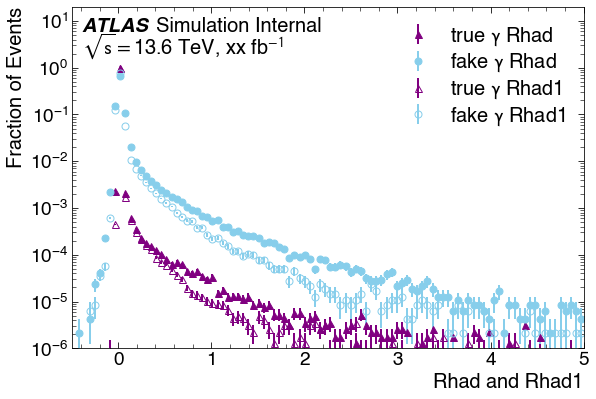

In [23]:
ap.ATLAShist4(Rhadhisto1,Rhadhisto2,Rhad1histo1,Rhad1histo2,'Rhad and Rhad1',ap.minmaxlist[0],totalnorm=False, label1=r'true $\gamma$ Rhad',label2=r'fake $\gamma$ Rhad', label3=r'true $\gamma$ Rhad1',label4=r'fake $\gamma$ Rhad1')

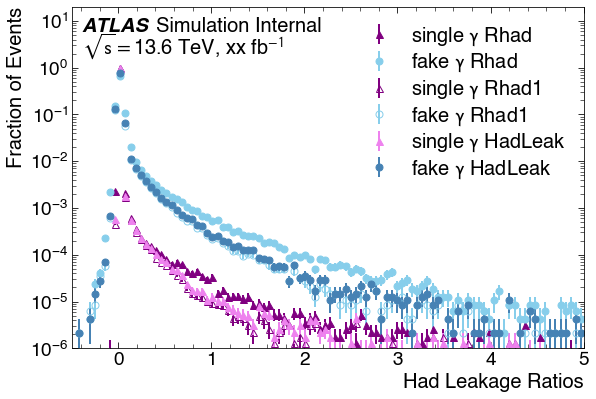

In [27]:
ATLAShist6(Rhadhisto1,Rhadhisto2,Rhad1histo1,Rhad1histo2,HadLeakhisto1,HadLeakhisto2,'Had Leakage Ratios')